<a href="https://colab.research.google.com/github/Prashant-Shaw/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

## **Importing Libraries**

In [197]:
import numpy as np
import pandas as pd
from numpy import math

from geopy.distance import geodesic
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

## **Mounting Drive & Reading Dataset**

In [115]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [116]:
nyc_taxi_path = '/content/mydrive/MyDrive/AlmaBetter/Capstone Project - Supervised ML Regression/NYC Taxi Data.csv'
nyc_taxi_df = pd.read_csv(nyc_taxi_path)

## **Exploring The Dataset**

In [117]:
nyc_taxi_df.shape

(1458644, 11)

There are total 1458644 entries and 11 features in the dataset. Lets explore more to know the type of features.

In [118]:
#Columns in the dataset
nyc_taxi_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [119]:
#Let's look at the dataset
nyc_taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [120]:
#Checking the datatype of each features.
nyc_taxi_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

* id, pickup_datetime, dropoff_datetime, store_and_fwd_flag are of object dtype.
* vendor_id, passenger_count and trip_duration are of int dtype.
* pickup_longitude, pickup_lattitude, dropoff_longitude and dropoff_lattitude are of float dtype.

###Independent Variables - 
id, 
vendor_id, 
pickup_datetime, 
dropoff_datetime, 
passenger_count, 
pickup_longitude, 
pickup_latitude, 
dropoff_longitude, 
dropoff_latitude, 
store_and_fwd_flag

###Dependent / Target Variable -
trip_duration 

In [121]:
#Checking for null values in the dataset
nyc_taxi_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

There are no null values in the dataset which is good.

In [122]:
#Checking the info of the dataset
nyc_taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [123]:
#Checking the unique values in the dataset
nyc_taxi_df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

There are 1458644 unique entries in column 'id' which is same as number of rows in the dataset. So, there is no duplicate entries in the dataset.  

In [124]:
#Describing the dataset
nyc_taxi_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


From the above description we infer that - 

The min passenger_count in the dataset is 0 which is not possible so this might be the error in recording the data or the driver might have entered wrongly the number of passengers to increase the trip counts so, we will drop the readings where passenger count is 0. 

## **Preprocessing & Visualizing The Data**

## **Univariate Analysis**

### **Exploring passenger_count column**

In [125]:
#Dropping the rows where passenger_count is 0.
nyc_taxi_df=nyc_taxi_df[nyc_taxi_df['passenger_count']!=0]

In the passenger_count the maximum entry is 9 which also doesn't seems correct. So, lets explore the passenger_count column.

In [126]:
#Extracting the count of passengers for each trip.
nyc_taxi_df['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
7          3
9          1
8          1
Name: passenger_count, dtype: int64

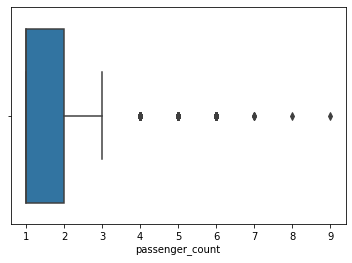

In [127]:
#Plotting boxplot for passenger_count to check the outliers.
sns.boxplot(nyc_taxi_df['passenger_count'])

In the column passenger_count for number of passengers 7, 8 & 9 there are only 3, 1 & 1 entries respectively which is very less compared to passenger_count for other trips. Also, in traditional taxi maximum of 6 passengers (if it is a SUV) are allowed So, lets drop these outliers.

In [128]:
#Dropping the rows where passenger_count is 7, 8 & 9.
nyc_taxi_df=nyc_taxi_df[nyc_taxi_df['passenger_count']<7]
nyc_taxi_df.reset_index(inplace = True, drop = True)

In [129]:
#Checking the passenger_count feature after removing the outliers.
nyc_taxi_df['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
Name: passenger_count, dtype: int64

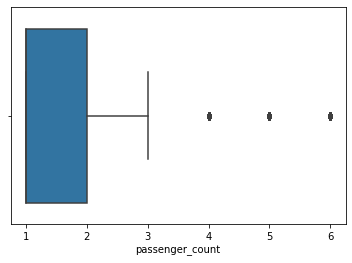

In [130]:
#Plotting boxplot again for passenger_count after removing the outliers.
sns.boxplot(nyc_taxi_df['passenger_count'])

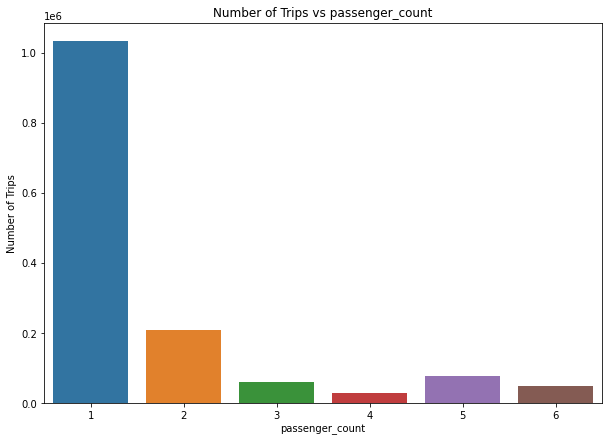

In [131]:
#Plotting Number of Trips vs passenger_count.
plt.figure(figsize=(10,7))
plt.title("Number of Trips vs passenger_count")
sns.countplot(x = 'passenger_count', data = nyc_taxi_df)
plt.xlabel("passenger_count")
plt.ylabel("Number of Trips")
plt.show()

From the above graph we infer that most of the people prefer to go solo. And, the median of the data is at 2 passenger_count and mean is little bit right of median so this feature is right skewed.

### **Exploring VendorID column**

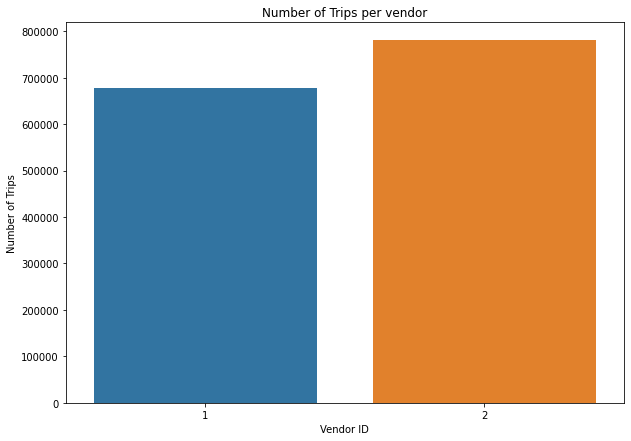

In [132]:
#Plotting countplot for vendor_id.
plt.figure(figsize=(10,7))
plt.title("Number of Trips per vendor")
sns.countplot(x = 'vendor_id', data = nyc_taxi_df)
plt.xlabel("Vendor ID")
plt.ylabel("Number of Trips")
plt.show()

Trips taken by the vendor 2 is more than vendor 1.

### **Exploring the pickup and dropoff datetime columns and extracting more features out of it for the dataset.**

In [133]:
#Changing the dtype of pickup_datetime & dropoff_datetime from object type to datetime.
nyc_taxi_df['pickup_datetime'] = pd.to_datetime(nyc_taxi_df['pickup_datetime'])
nyc_taxi_df['dropoff_datetime'] = pd.to_datetime(nyc_taxi_df['dropoff_datetime'])

Let's develop some more features from the datetime column. As we already have a seperate trip_duration column so the datetime column we can use to extract some more useful insights to the dataset.

In [134]:
#Making two new features pickup_day and dropoff_day from datetime to get more insights to the trips day wise
nyc_taxi_df['pickup_day'] = nyc_taxi_df['pickup_datetime'].dt.day_name()
nyc_taxi_df['dropoff_day'] = nyc_taxi_df['dropoff_datetime'].dt.day_name()

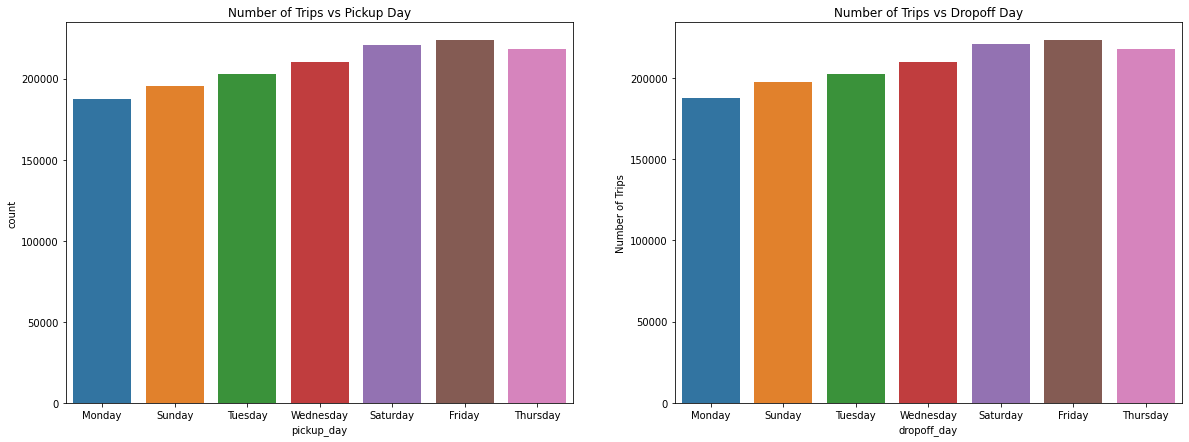

In [135]:
#Plotting countplots for pickup_day and dropoff_day.
figure,(fig1,fig2) = plt.subplots(ncols = 2,figsize=(20,7))
fig1.set_title("Number of Trips vs Pickup Day")
ax = sns.countplot(x = 'pickup_day', data = nyc_taxi_df, ax = fig1)
ax = plt.xlabel("pickup_day")
ax = plt.ylabel("Number of Trips")
fig2.set_title("Number of Trips vs Dropoff Day")
ax = sns.countplot(x = 'dropoff_day', data = nyc_taxi_df, ax = fig2)
ax = plt.xlabel("dropoff_day")
ax = plt.ylabel("Number of Trips")
plt.show()

From the above graph we can infer that most of the trips are done on Friday and Saturday. So, on weekends people prefer to go on trips.

In [136]:
#Extracting Hr from datetime to visualize at which time of the day most of the trips are done.
nyc_taxi_df['pickup_hr'] = nyc_taxi_df['pickup_datetime'].dt.hour
nyc_taxi_df['dropoff_hr'] = nyc_taxi_df['dropoff_datetime'].dt.hour

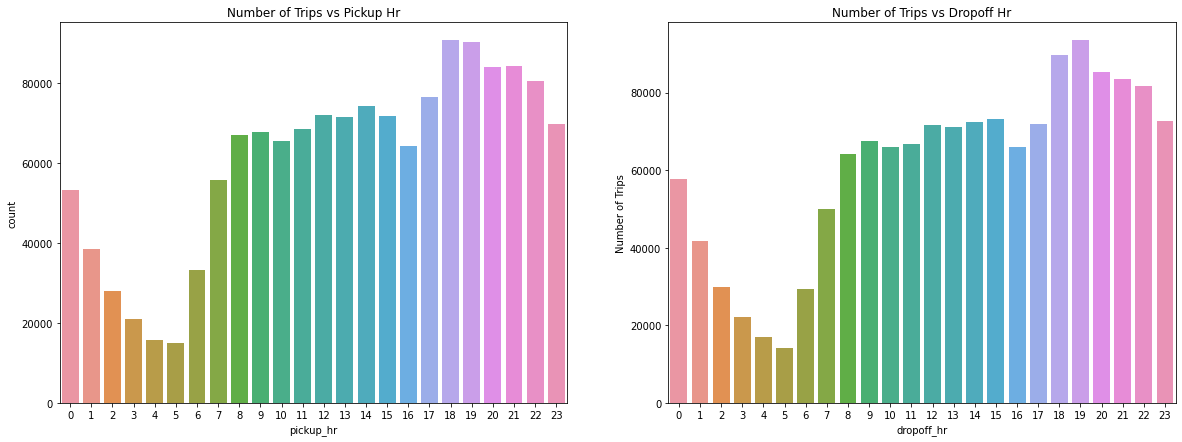

In [137]:
#Plotting countplots for pickup_hr and dropoff_hr.
figure,(fig3,fig4) = plt.subplots(ncols = 2,figsize=(20,7))
fig3.set_title("Number of Trips vs Pickup Hr")
ax = sns.countplot(x = 'pickup_hr', data = nyc_taxi_df, ax = fig3)
ax = plt.xlabel("pickup_hr")
ax = plt.ylabel("Number of Trips")
fig4.set_title("Number of Trips vs Dropoff Hr")
ax = sns.countplot(x = 'dropoff_hr', data = nyc_taxi_df, ax = fig4)
ax = plt.xlabel("dropoff_hr")
ax = plt.ylabel("Number of Trips")
plt.show()

The above graph shows that most of the trips are done between 6:00 PM to 7:00 PM, reason might be this is the time when people will leave from offices and they are taking cab on their way back home or on Friday since we saw is the busiest day we can infer that most of the people are going for trips after office on Friday.

In [138]:
#Function to check at which time of the day (Morning, Afternoon, Evening or Night) trips are done.
def time_of_day(hr):
  if hr>=6 and hr<12:
    return 'Morning'
  elif hr>=12 and hr<17:
    return 'Afternoon'
  elif hr>=17 and hr<22:
    return 'Evening'
  else:
    return 'Night'

In [139]:
#Making columns 'pickup_timeofday' and 'dropoff_timeofday' from 'pickup_hr' and 'dropoff_hr' column
nyc_taxi_df['pickup_timeofday'] = nyc_taxi_df['pickup_hr'].apply(time_of_day)
nyc_taxi_df['dropoff_timeofday'] = nyc_taxi_df['dropoff_hr'].apply(time_of_day)

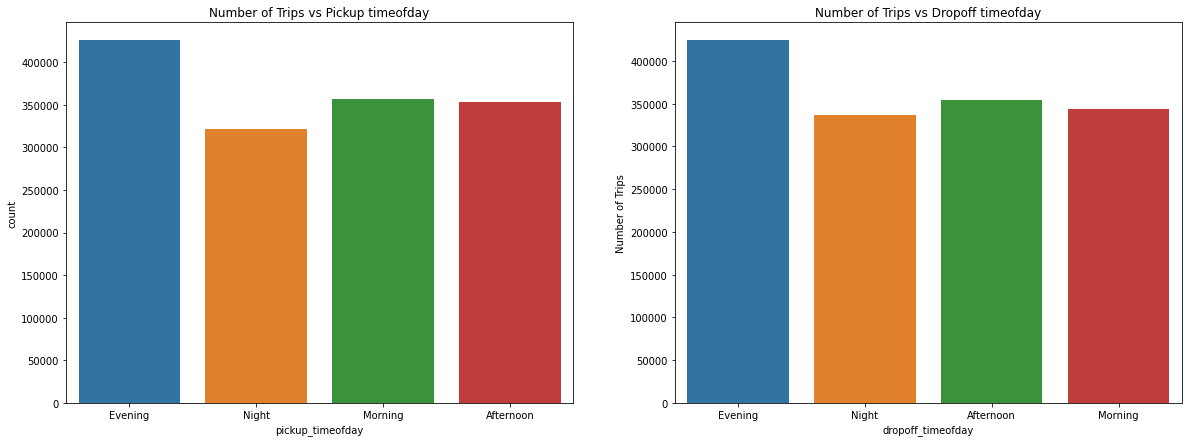

In [140]:
#Plotting countplots for pickup_timeofday and dropoff_timeofday.
figure,(fig5,fig6) = plt.subplots(ncols = 2,figsize=(20,7))
fig5.set_title("Number of Trips vs Pickup timeofday")
ax = sns.countplot(x = 'pickup_timeofday', data = nyc_taxi_df, ax = fig5)
ax = plt.xlabel("pickup_timeofday")
ax = plt.ylabel("Number of Trips")
fig6.set_title("Number of Trips vs Dropoff timeofday")
ax = sns.countplot(x = 'dropoff_timeofday', data = nyc_taxi_df, ax = fig6)
ax = plt.xlabel("dropoff_timeofday")
ax = plt.ylabel("Number of Trips")
plt.show()

Above graph shows that most of the trips are taken in the evening we found the same thing in the previous graph that most of the trips are between 6:00 PM to 7:00 PM.

In [141]:
#Extracting trip_month from datetime to visualize which month there was more trips.
nyc_taxi_df['trip_month'] = nyc_taxi_df['pickup_datetime'].dt.month

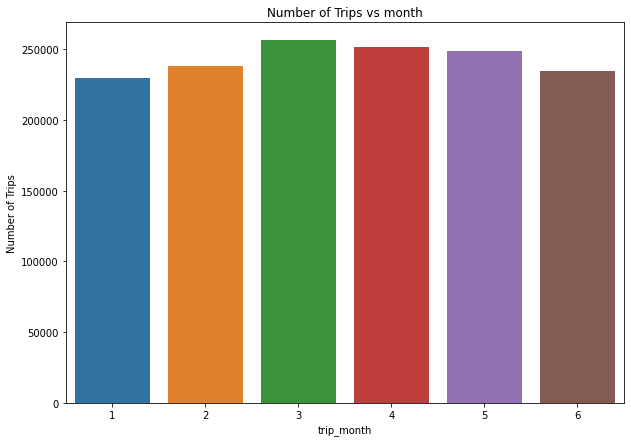

In [142]:
#Plotting countplot for month.
plt.figure(figsize=(10,7))
plt.title("Number of Trips vs month")
sns.countplot(x = 'trip_month', data = nyc_taxi_df)
plt.xlabel("trip_month")
plt.ylabel("Number of Trips")
plt.show()

Number of trips are not varying much if we observe month wise.

### **Exploring latitude longitude column**

In [143]:
#Function to get distance in km out of pickup and dropoff latitude and longitude
def get_distance_km(lat_1,long_1,lat_2,long_2):
  pick_cord = (lat_1,long_1)
  drop_cord = (lat_2,long_2)
  return geodesic(pick_cord, drop_cord).kilometers

In [144]:
#Adding a new column distance which contains the distance between pickup and drop location in km
nyc_taxi_df['distance'] = nyc_taxi_df.apply(lambda x: get_distance_km(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']), axis=1)

In [145]:
nyc_taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_hr,dropoff_hr,pickup_timeofday,dropoff_timeofday,trip_month,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,17,17,Evening,Evening,3,1.502172
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,0,0,Night,Night,6,1.808660
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,11,12,Morning,Afternoon,1,6.379687
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,19,19,Evening,Evening,4,1.483632
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,13,13,Afternoon,Afternoon,3,1.187038


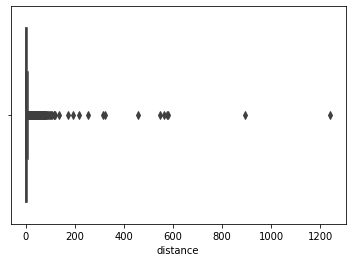

In [146]:
#Plotting boxplot for distance column.
sns.boxplot(nyc_taxi_df['distance'])

From this box plot we can see that there are some trips with more than 200kms distance travelled. We can not direclty delete these data as these might be the long trips people take for vacation or on weekends.

In [147]:
# Exploring the distance feature.
nyc_taxi_df['distance'].value_counts()

0.000000     5887
2.064458        2
0.942752        2
0.000644        2
1.289928        2
             ... 
2.817283        1
26.281212       1
2.252518        1
2.133112        1
1.133655        1
Name: distance, Length: 1452682, dtype: int64

From the above data we can infer that there are 5887 entries with 0.0km distance which is again not a correct entry. We have to deep dive in this column to check why the distance covered is 0.0km.

In [148]:
nyc_taxi_df[nyc_taxi_df['distance']==0.0].head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_hr,dropoff_hr,pickup_timeofday,dropoff_timeofday,trip_month,distance
246,id3487442,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.981819,40.768963,-73.981819,40.768963,N,227,Monday,Monday,18,18,Evening,Evening,2,0.0
291,id0924324,2,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.959068,40.775661,-73.959068,40.775661,N,1109,Tuesday,Tuesday,18,18,Evening,Evening,5,0.0
407,id1145809,2,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,N,947,Monday,Monday,23,23,Night,Night,5,0.0
702,id3499387,1,2016-01-25 19:45:12,2016-01-25 19:54:52,1,-73.786720,40.647041,-73.786720,40.647041,N,580,Monday,Monday,19,19,Evening,Evening,1,0.0
1620,id0753277,1,2016-01-27 22:29:31,2016-01-27 22:29:58,1,-74.209854,40.816853,-74.209854,40.816853,N,27,Wednesday,Wednesday,22,22,Night,Night,1,0.0
1728,id2134482,1,2016-01-22 16:13:01,2016-01-22 16:13:20,1,-73.776314,40.645454,-73.776314,40.645454,N,19,Friday,Friday,16,16,Afternoon,Afternoon,1,0.0
1769,id2892749,1,2016-01-18 15:24:43,2016-01-18 15:28:57,5,-73.954666,40.821003,-73.954666,40.821003,Y,254,Monday,Monday,15,15,Afternoon,Afternoon,1,0.0
2087,id0931199,2,2016-05-04 22:28:43,2016-05-04 22:32:51,1,-73.954628,40.777180,-73.954628,40.777180,N,248,Wednesday,Wednesday,22,22,Night,Night,5,0.0
2441,id2251007,2,2016-05-23 14:20:49,2016-05-23 14:20:57,1,-73.781830,40.644699,-73.781830,40.644699,N,8,Monday,Monday,14,14,Afternoon,Afternoon,5,0.0
2609,id1992673,2,2016-03-02 20:10:41,2016-03-02 20:30:53,5,-73.875313,40.773682,-73.875313,40.773682,N,1212,Wednesday,Wednesday,20,20,Evening,Evening,3,0.0


From the above data we can infer that for some of the entries trip_duration is more than 1000s still the distance is 0.0km. We will deep dive more for these data in bivariate analysis when we will be comparing the distance with trip_duration.

### **Exploring the column trip duration.**

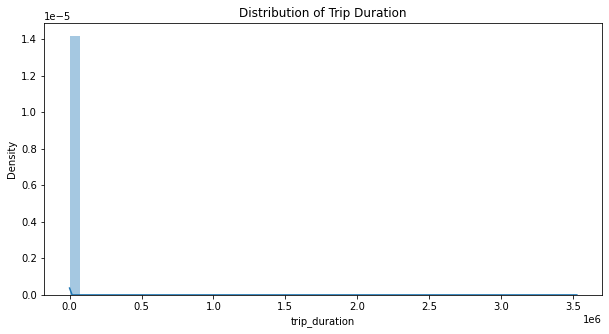

In [149]:
#Plotting distribution of target variable trip_duration.
plt.figure(figsize=(10,5))
plt.title("Distribution of Trip Duration")
sns.distplot(nyc_taxi_df['trip_duration'])
plt.show()

From the above graph we can easily infer that there are some outliers because of which the graph is highly skewed. The same thing can be seen from boxplot.

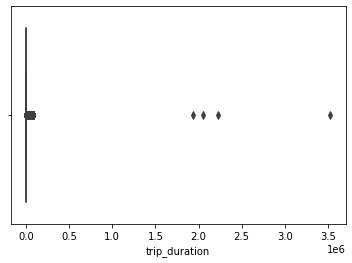

In [150]:
#Plotting boxplot for trip_duration
sns.boxplot(nyc_taxi_df['trip_duration'])

In [151]:
#Look for outlier in the trip_duration column.
nyc_taxi_df.sort_values(by = 'trip_duration', ascending = False).head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_hr,dropoff_hr,pickup_timeofday,dropoff_timeofday,trip_month,distance
978342,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282,Saturday,Friday,22,18,Night,Evening,2,19.926608
924111,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612,Tuesday,Sunday,6,1,Morning,Night,1,1.633027
680570,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578,Saturday,Tuesday,22,15,Night,Afternoon,2,5.992874
354994,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736,Tuesday,Wednesday,0,11,Night,Morning,1,20.160235
1234240,id1942836,2,2016-02-15 23:18:06,2016-02-16 23:17:58,2,-73.794525,40.644825,-73.991051,40.755573,N,86392,Monday,Tuesday,23,23,Night,Night,2,20.666941


After sorting out the dataset with respect to trip_duration in descending order we found out that the longest trip durations 3526282s, 2227612s, 2049578s and 1939736s are clearly outliers as the corresponding distance covered for the same trips are 19.9km, 1.6km, 5.99km and 20.16km. There might be several reasons for this - 
* The driver have enter the dropoff time wrongly.
* The driver might have forgotten to record the dropoff time and lately when he remembers he could have recorded any random time.

Clearly, time taken for for such trips shouldn't be that high so, we have to remove these outliers.

For removing these outliers I am calculating the average speed for the whole dataset and then I will use the equation, 
trip_duration = distance/average_speed 
for approximately calculating trip_duration for these outliers.

In [152]:
#Calculating the average speed considering all the entries except for the outliers.
total_distance = nyc_taxi_df.sort_values(by = 'trip_duration', ascending = False).loc[5:,['distance']].values.sum()
total_duration = nyc_taxi_df.sort_values(by = 'trip_duration', ascending = False).loc[5:,['trip_duration']].values.sum()
avg_speed = total_distance/total_duration
print(f'Total Distance - {total_distance} km')
print(f'Total Duration - {total_duration} s')
print(f'Average Speed - {avg_speed} km/s')

Total Distance - 503799.6484398022 km
Total Duration - 124279144 s
Average Speed - 0.004053774689981789 km/s


In [153]:
#Function to change the trip_duration for outliers.
def change_trip_duration(speed, distance):
  duration = distance/avg_speed
  return (int(duration))

In [154]:
#Changing the outliers for trip_duration
nyc_taxi_df.reset_index(inplace = True, drop = True)
for rows in range(1,nyc_taxi_df.shape[0]):
  if nyc_taxi_df['trip_duration'][rows] > 1000000:
    nyc_taxi_df['trip_duration'][rows] = change_trip_duration(avg_speed, nyc_taxi_df['distance'][rows])
    #print (nyc_taxi_df['trip_duration'][i])

nyc_taxi_df.sort_values(by = 'trip_duration', ascending = False).head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_hr,dropoff_hr,pickup_timeofday,dropoff_timeofday,trip_month,distance
1234240,id1942836,2,2016-02-15 23:18:06,2016-02-16 23:17:58,2,-73.794525,40.644825,-73.991051,40.755573,N,86392,Monday,Tuesday,23,23,Night,Night,2,20.666941
295376,id0593332,2,2016-05-31 13:00:39,2016-06-01 13:00:30,1,-73.781952,40.644688,-73.993874,40.745926,N,86391,Tuesday,Wednesday,13,13,Afternoon,Afternoon,5,21.147722
73815,id0953667,2,2016-05-06 00:00:10,2016-05-07 00:00:00,1,-73.996010,40.753220,-73.979027,40.740601,N,86390,Friday,Saturday,0,0,Night,Night,5,2.005244
59891,id2837671,2,2016-06-30 16:37:52,2016-07-01 16:37:39,1,-73.992279,40.749729,-73.962524,40.800770,N,86387,Thursday,Friday,16,16,Afternoon,Afternoon,6,6.199703
1360381,id1358458,2,2016-06-23 16:01:45,2016-06-24 16:01:30,1,-73.782089,40.644806,-73.985016,40.666828,N,86385,Thursday,Friday,16,16,Afternoon,Afternoon,6,17.335134


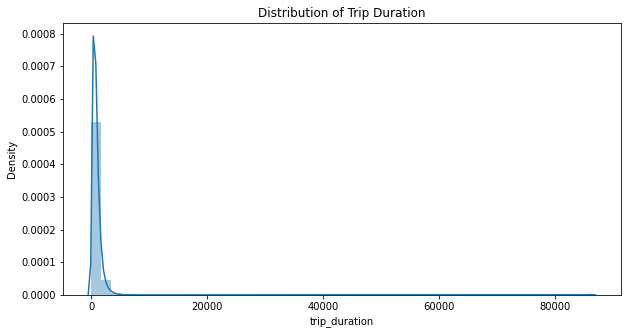

In [155]:
#Checking the distribution of trip_duration again after removing the outliers.
plt.figure(figsize=(10,5))
plt.title("Distribution of Trip Duration")
sns.distplot(nyc_taxi_df['trip_duration'])
plt.show()

After removing the outlier skewness is improved still there is some skewness in the data which will improve after doing the log transformation of the data.

### **Exploring store_and_fwd_flag column**

In [156]:
#Checking the number of store and forward trips.
nyc_taxi_df['store_and_fwd_flag'].value_counts()

N    1450537
Y       8042
Name: store_and_fwd_flag, dtype: int64

The above data shows that 8042 trips record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server. The major reason might be that the trip was done for outstation where network was not good or the driver doesn't have proper network strength to share the data real time to the server.

In [157]:
#Exploring the dataset more where store_and_fwd_flag is 'Y'.
nyc_taxi_df[nyc_taxi_df['store_and_fwd_flag'] == 'Y']

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_hr,dropoff_hr,pickup_timeofday,dropoff_timeofday,trip_month,distance
348,id1633648,1,2016-06-20 14:19:16,2016-06-20 14:34:34,1,-73.977905,40.754871,-73.952774,40.768166,Y,918,Monday,Monday,14,14,Afternoon,Afternoon,6,2.585050
491,id2042535,1,2016-02-12 12:36:38,2016-02-12 12:47:07,1,-73.978981,40.756519,-73.992165,40.749203,Y,629,Friday,Friday,12,12,Afternoon,Afternoon,2,1.378288
610,id0909228,1,2016-05-08 15:02:28,2016-05-08 15:17:54,1,-73.988510,40.742935,-74.010620,40.723507,Y,926,Sunday,Sunday,15,15,Afternoon,Afternoon,5,2.853606
774,id3697489,1,2016-01-13 13:53:29,2016-01-13 14:08:21,1,-73.948982,40.781578,-73.982346,40.778923,Y,892,Wednesday,Wednesday,13,14,Afternoon,Afternoon,1,2.831724
846,id1026973,1,2016-06-25 21:53:30,2016-06-25 22:05:27,1,-73.982628,40.762341,-73.995537,40.749779,Y,717,Saturday,Saturday,21,22,Evening,Night,6,1.770384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457491,id2229555,1,2016-01-22 19:05:50,2016-01-22 19:27:09,1,-73.874535,40.774082,-73.925362,40.732521,Y,1279,Friday,Friday,19,19,Evening,Evening,1,6.302747
1457605,id0510811,1,2016-04-07 21:14:30,2016-04-07 21:51:38,1,-73.781944,40.644760,-73.976173,40.670235,Y,2228,Thursday,Thursday,21,21,Evening,Evening,4,16.667616
1457832,id3209015,1,2016-03-20 18:49:55,2016-03-20 19:09:25,1,-73.990097,40.714352,-74.002579,40.750145,Y,1170,Sunday,Sunday,18,19,Evening,Evening,3,4.112272
1457995,id1371896,1,2016-03-28 11:45:49,2016-03-28 12:21:45,1,-73.971008,40.759079,-74.010025,40.720810,Y,2156,Monday,Monday,11,12,Morning,Afternoon,3,5.377813


In this data we can see that these trips are done by vendor 1 let's check if these trips are done by only vendor 1 or vendor 2 is also there.

In [158]:
#Checking which vendor_id has store_and_fwd_flag as 'Y'
nyc_taxi_df[nyc_taxi_df['store_and_fwd_flag'] == 'Y']['vendor_id'].value_counts()

1    8042
Name: vendor_id, dtype: int64

From this we can infer that all the store_and_fwd_flag trips are done by vendor 1. So, vendor 1 has to work on its connectivity to the server so that it can share the data in realtime to the server.

## **Bivariate Analysis**

We will first explore all the features with respect to Trip Duration as it is the target variable.

### **Trip duration vs Vendor ID**

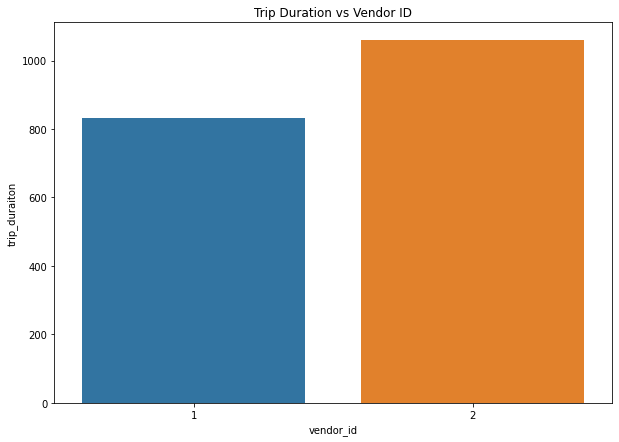

In [159]:
#Plotting Trip Duration vs Vendor ID.
trip_vendor_df = nyc_taxi_df.groupby(['vendor_id'])[['trip_duration']].mean().reset_index()
plt.figure(figsize=(10,7))
plt.title("Trip Duration vs Vendor ID")
sns.barplot(x = 'vendor_id', y = 'trip_duration', data = trip_vendor_df)
plt.xlabel("vendor_id")
plt.ylabel("trip_duraiton")
plt.show()

The above graph shows that average trip duration for vendor 2 is higher than vendor 1 by approx 200sec. This means, on an average vendor 2 takes 200sec(or 3mins) more than vendor 1 per trip.

### **Trip Duration per Hour**

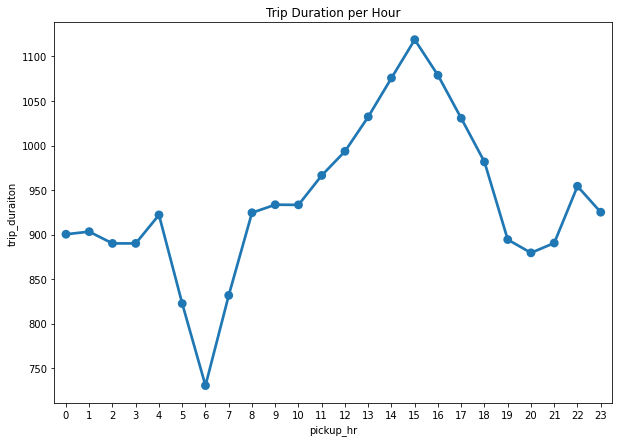

In [160]:
#Plotting Trip Duration per Hour.
trip_hr_df = nyc_taxi_df.groupby(['pickup_hr'])[['trip_duration']].mean().reset_index()
plt.figure(figsize=(10,7))
plt.title("Trip Duration per Hour")
sns.pointplot(x = 'pickup_hr', y = 'trip_duration', data = trip_hr_df)
plt.xlabel("pickup_hr")
plt.ylabel("trip_duraiton")
plt.show()

From the above graph we can infer that -
* Average trip_duration is highest at 3:00 PM so, at this time the traffic is more.
* At morning 6:00 AM there is lowest traffic and thus the trip_duration is also very less at that time. 
* Traffic starts increasing after 6:00AM as more and more people starts going out for work, schools, vacation etc.
* Traffic starts decreasing after 3:00 PM as people starts coming to their home.
* Between 7:00 PM to 9:00 PM and 12:00AM to 4:00AM there is average traffic.

### **Trip Duration per day of week**

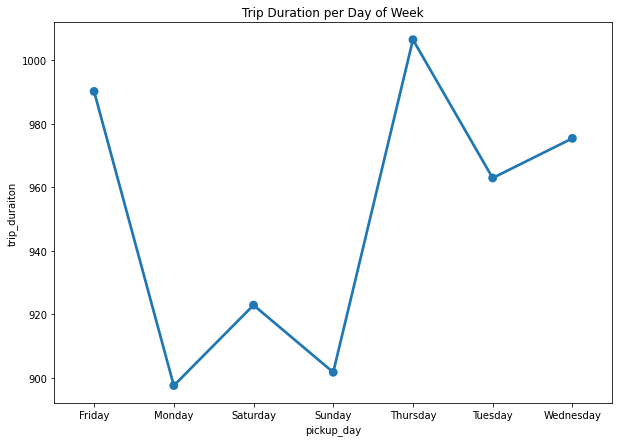

In [161]:
#Plotting Trip Duration per Day of Week.
trip_day_df = nyc_taxi_df.groupby(['pickup_day'])[['trip_duration']].mean().reset_index()
plt.figure(figsize=(10,7))
plt.title("Trip Duration per Day of Week")
sns.pointplot(x = 'pickup_day', y = 'trip_duration', data = trip_day_df)
plt.xlabel("pickup_day")
plt.ylabel("trip_duraiton")
plt.show()

The above graph shows that average trip duration is less on Saturday, Sunday and Monday and it increases drastically on Tuesday, Wednessday and Thursday having highest average trip duration on Thursday.

### **Trip Duration per Time of day**

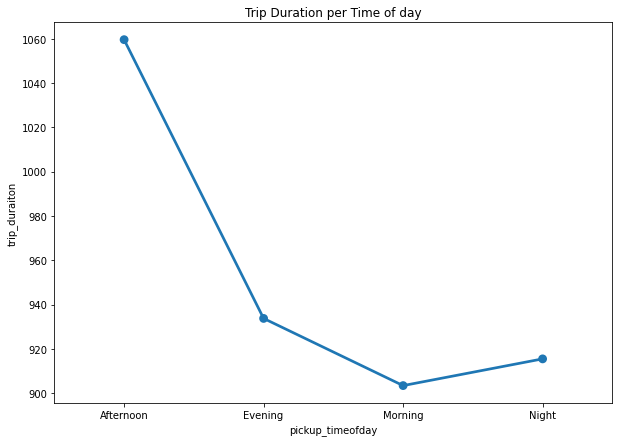

In [162]:
#Plotting Trip Duration per Time of Week.
trip_timeday_df = nyc_taxi_df.groupby(['pickup_timeofday'])[['trip_duration']].mean().reset_index()
plt.figure(figsize=(10,7))
plt.title("Trip Duration per Time of day")
sns.pointplot(x = 'pickup_timeofday', y = 'trip_duration', data = trip_timeday_df)
plt.xlabel("pickup_timeofday")
plt.ylabel("trip_duraiton")
plt.show()

This graph also shows that the average time duration is most in the afternoon, lowest in the morning and average in the evening and night. 

### **Trip Duration vs Distance**

This two columns has to be explored properly as there should be a linear relationship between Trip Duration and Distance.

In [163]:
#Function for plotting trip_duration vs Distance
def trip_duration_vs_distance():
  plt.figure(figsize=(10,7))
  plt.title("Trip Duration vs Distance")
  sns.scatterplot(x = 'distance', y = 'trip_duration', data = nyc_taxi_df)
  plt.xlabel("Distance in km")
  plt.ylabel("Trip Duration in sec")
  plt.show()

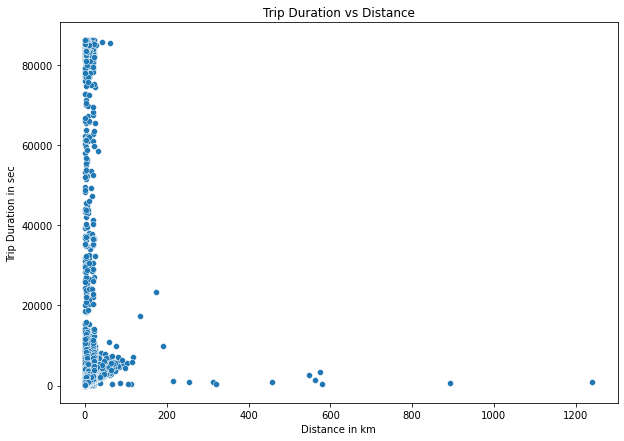

In [164]:
trip_duration_vs_distance()

From the above graph we can notice majorly two points - 


1.   There are some data where more than 200kms of distance are covered within a very short time which is not possible.
2.   For some of the data distance covered is quite low still the trip duration is more than 20000 secs (>5hrs) this also shows that there is some ambiguity in the data.



Let's clear the above two outliers one by one. 
First we will be clearing the outliers in which quite a huge distance is covered in negligible timing. For doing this lets calculate the speed for each trip in km/hr.

In [165]:
#Function for calculating the speed for each trip in km/hr
def get_speed(dis_in_km, t_dur_in_sec):
  sp = (dis_in_km / (t_dur_in_sec/3600))
  return sp

In [166]:
#Adding a new column speed which contains the speed for each trip
nyc_taxi_df['speed'] = nyc_taxi_df.apply(lambda x: get_speed(x['distance'],x['trip_duration']), axis=1)

In [167]:
#Sorting the dataset in ascending order wrt speed and checking the head to see what is the max speed in the dataset.
nyc_taxi_df.sort_values(by = 'speed', ascending = False).head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_hr,dropoff_hr,pickup_timeofday,dropoff_timeofday,trip_month,distance,speed
1176287,id3619353,2,2016-02-13 20:28:30,2016-02-13 20:28:37,1,-73.936974,40.764610,-73.789848,40.646858,N,7,Saturday,Saturday,20,20,Evening,Evening,2,18.043631,9279.581773
910037,id1146400,1,2016-02-15 18:57:32,2016-02-15 19:02:35,2,-73.989914,40.756634,-70.346077,36.398121,N,303,Monday,Monday,18,19,Evening,Evening,2,578.579744,6874.214785
184923,id2306955,1,2016-05-07 18:58:53,2016-05-07 19:12:05,1,-72.809669,51.881084,-73.987228,40.750599,N,792,Saturday,Saturday,18,19,Evening,Evening,5,1240.510256,5638.682980
974337,id1510552,2,2016-01-06 20:40:52,2016-01-06 20:51:03,5,-71.799896,35.081532,-79.352837,40.436329,N,611,Wednesday,Wednesday,20,20,Evening,Evening,1,891.663777,5253.665463
377058,id0116374,1,2016-04-02 20:33:19,2016-04-02 20:38:01,1,-74.007095,40.717113,-76.963242,38.946033,N,282,Saturday,Saturday,20,20,Evening,Evening,4,320.445202,4090.789812


From the data we can see that there are entries with speed more than 1000km/hr also which clearly shows that these are wrong entries as the max speed allowed in nyc is 55miles/hr (= 88.5km/hr).
This speed data is taken from following site - 
https://www.newyorksafetycouncil.com/articles/speed-limits-in-new-york/

In this article it is mentioned - 
You must obey the posted speed limit or, if no limit is posted, drive no faster than 55 mph. Be aware, however, that some cities in New York have speed limits lower than 55 mph that may not be posted. For example, the speed limit is 25 mph in New York City unless another limit is posted.

For our dataset let's keep only those data where the speed is max 100km/hr.

In [168]:
#Taking only those entries where the speed <= 100km/hr.
nyc_taxi_df = nyc_taxi_df[nyc_taxi_df['speed'] <= 100.0]
nyc_taxi_df.shape

(1458406, 20)

Plotting the scatter plot again for trip_duration vs distance afer clearing the outliers.

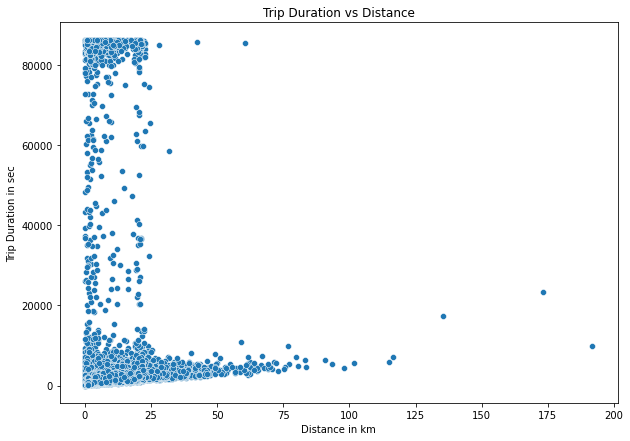

In [169]:
trip_duration_vs_distance()

Now lets take the case where distance covered is quite less but the trip duration is considerably high.

First let's remove those outliers where distance covered is 0.0km still trip_duration is more than 1 min or 60secs.

In [170]:
#Removing the entries where distance is 0.0km and duration is more than 1 min. 
nyc_taxi_df = nyc_taxi_df[~((nyc_taxi_df['distance'] == 0.0) & (nyc_taxi_df['trip_duration']>=60))]
nyc_taxi_df.shape

(1454186, 20)

Also, we will remove the entries where the distance is less than 1km but trip duration is more than one hour as it is quite obvious that in 1hr the distance covered will be surely more than 1km.

In [171]:
#Removing the entries where distance is less than 1.0km and duration is more than 1hr (or 3600 sec). 
nyc_taxi_df = nyc_taxi_df[~((nyc_taxi_df['distance'] <= 1.0) & (nyc_taxi_df['trip_duration']>=3600))]
nyc_taxi_df.shape

(1453742, 20)

Let's delete some more outliers where distance covered is less than 75km but trip_duraiton is more than 30000secs (~ 8hrs). As, it is quite obvious whatever the situation might be if the trip is going with 10km/hr speed also then in 8hrs we are expected to cover 80km but the current data shows there are some entries where the speed is much lesser than that which clearly shows that those are outliers.

In [172]:
nyc_taxi_df = nyc_taxi_df[~((nyc_taxi_df['distance'] <= 75.0) & (nyc_taxi_df['trip_duration']>=30000))]
nyc_taxi_df.shape

(1452017, 20)

Plotting trip_duration vs distance after removing all the outliers.

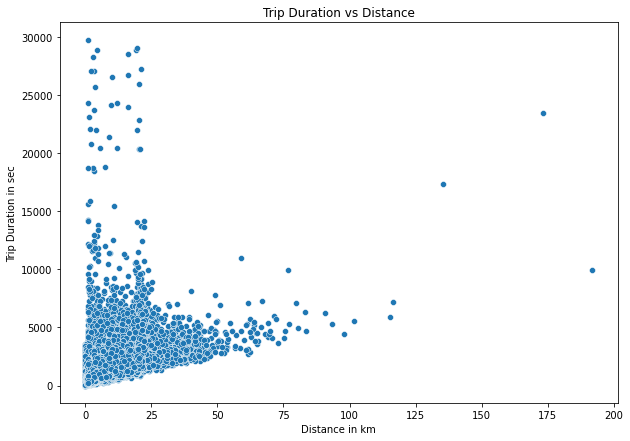

In [173]:
trip_duration_vs_distance()

### **Pickup and Dropoff Latitude and Longitude Plots**

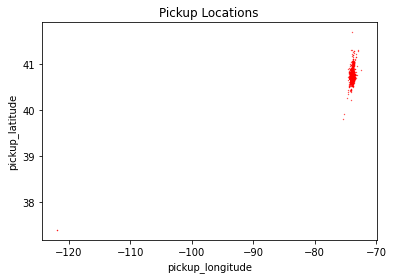

In [174]:
#Plotting the pickup latitude and longitude.
nyc_taxi_df.plot(kind='scatter', x='pickup_longitude',y='pickup_latitude', color='red', s=0.1, alpha =1)
plt.title('Pickup Locations')
plt.xlabel("pickup_longitude")
plt.ylabel("pickup_latitude")
plt.show()

Above graph shows that one of the location is very far away from the usual operating zone this might be entered due to some error. Let's remove this outlier.

In [175]:
#Removing the pickup location which is very far away from the other pickup locations.
nyc_taxi_df = nyc_taxi_df[nyc_taxi_df['pickup_longitude']>-100.0]

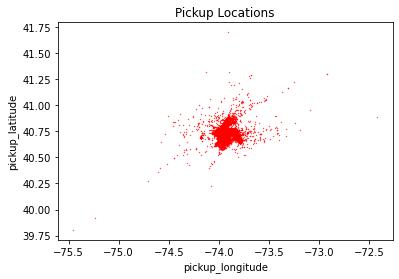

In [176]:
#Plotting the pickup latitude and longitude again after removing the outlier.
nyc_taxi_df.plot(kind='scatter', x='pickup_longitude',y='pickup_latitude', color='red', s=0.1, alpha =1)
plt.title('Pickup Locations')
plt.xlabel("pickup_longitude")
plt.ylabel("pickup_latitude")
plt.show()

Let's view the concentrated area of the map.

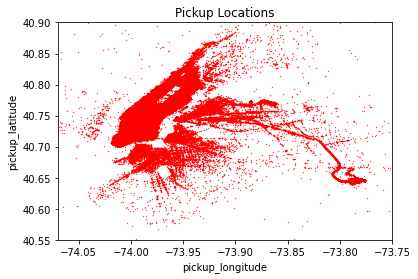

In [177]:
#Plotting the pickup latitude and longitude at the concentrated area of the map.
nyc_taxi_df.plot(kind='scatter', x='pickup_longitude',y='pickup_latitude', color='red', s=0.1, alpha =1)
plt.title('Pickup Locations')
plt.xlabel("pickup_longitude")
plt.ylabel("pickup_latitude")
plt.ylim([40.55,40.9])
plt.xlim([-74.07,-73.75])
plt.show()

Now lets look at the dropoff latitude and longitude.

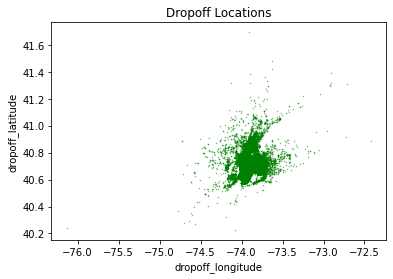

In [178]:
#Plotting the dropoff latitude and longitude.
nyc_taxi_df.plot(kind='scatter', x='dropoff_longitude',y='dropoff_latitude',color='green',s=0.2, alpha =.6)
plt.title('Dropoff Locations')
plt.xlabel("dropoff_longitude")
plt.ylabel("dropoff_latitude")
plt.show()

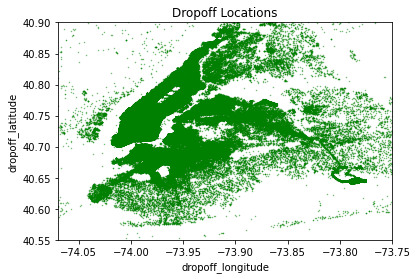

In [179]:
#Plotting the dropoff concentrated region.
nyc_taxi_df.plot(kind='scatter', x='dropoff_longitude',y='dropoff_latitude',color='green',s=0.2, alpha =.6)
plt.title('Dropoff Locations')
plt.xlabel("dropoff_longitude")
plt.ylabel("dropoff_latitude")
plt.ylim([40.55,40.9])
plt.xlim([-74.07,-73.75])
plt.show()

From the pickup and dropoff plots we can infer that dropoff locations are more distributed than the pickup locations.

In [181]:
nyc_taxi_df.shape

(1452015, 20)

We have removed all the outliers to the best of our knowledge.
Our initial dataset was having 1458644 entries and after removing the outliers we are having 1452015 entries. So, still we have 99.5% of the data for making the model.

## **Correlation Analysis**

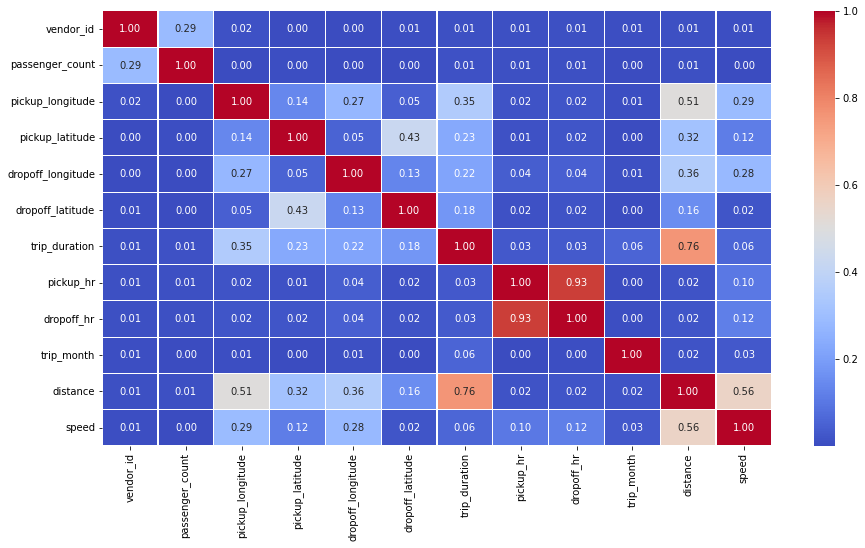

In [194]:
## Plotting Correlation HeatMap
plt.figure(figsize=(15,8))
correlation = nyc_taxi_df.corr()
sns.heatmap(abs(correlation), annot=True, linewidths = 0.1, fmt = '0.2f', cmap='coolwarm')
plt.show()

In [195]:
#Looking for the numerical features in the dataset.
numeric_features = nyc_taxi_df.describe().columns
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'pickup_hr',
       'dropoff_hr', 'trip_month', 'distance', 'speed'],
      dtype='object')

### **Removing multicollinearity using VIF - Variance Inflation Factor.**

In [198]:
#Funtion for VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [199]:
calc_vif(nyc_taxi_df[[feat for feat in nyc_taxi_df.describe().columns if feat not in ['vendor_id','trip_duration','speed']]])

,variables,VIF
0,passenger_count,2.605964e+00
1,pickup_longitude,3.507686e+06
2,pickup_latitude,2.502449e+06
3,dropoff_longitude,3.030832e+06
4,dropoff_latitude,1.753530e+06
5,pickup_hr,4.330339e+01
6,dropoff_hr,4.239736e+01
7,trip_month,5.379563e+00
8,distance,1.825114e+00


In [202]:
calc_vif(nyc_taxi_df[[feat for feat in nyc_taxi_df.describe().columns if feat not in ['vendor_id','trip_duration','speed','dropoff_hr','dropoff_longitude','dropoff_latitude','pickup_latitude','pickup_longitude']]])

,variables,VIF
0,passenger_count,2.276929
1,pickup_hr,3.461440
2,trip_month,3.463088
3,distance,1.654040
